# System of linear equations | Solving using SymPy 

[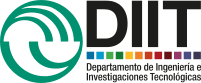](https://ingenieria.unlam.edu.ar/)  
2025 [Víctor A. Bettachini](mailto:vbettachini@unlam.edu.ar)  
[by-nc-sa_80x15.png](https://creativecommons.org/licenses/by-sa/4.0/) 

---

When modeling mechanical systems using generalized coordinates or velocities linked by constraints, it's possible that the corresponding Euler-Lagrange equation for each coordinate to be coupled to others.

We are usually interested in expressions for a particular acceleration that is not in terms of others, when solving the dynamics numerically.

Now we will generate a system of linear equations without actual applications, only to show two alternatives from the [SymPy library](https://www.sympy.org/index.html) that solve it in terms of one of the second derivatives.

## System of coupled linear equations

In [1]:
import sympy as sm # import functions for symbolic manipulations
from sympy.physics import mechanics as me
me.init_vprinting() # dot notation for velocity and acceleration

In [2]:
t = sm.Symbol('t')
m1, m2, m3, g = sm.symbols('m_1, m_2, m_3, g')
y1, y2 = me.dynamicsymbols('y_1, y_2')

In [4]:
equation1 = sm.Eq(
    g* (-m1+ m2+ m3)+ m1* y1.diff(t,2)+ m2* (y1.diff(t,2)- y2.diff(t,2))+ m3* (y1.diff(t,2) + y2.diff(t,2)) ,
    0 )
equation1

In [5]:
equation2 = sm.Eq(
    g* (m2- m3)+ m2* (y1.diff(t,2)- y2.diff(t,2))- m3* (y1.diff(t,2) + y2.diff(t,2)) ,
    0 )
equation2

In [6]:
systemEquations = [
    equation1,
    equation2,
] # list with both equations

In [7]:
variablesSolution = [
    y1.diff(t,2),
    y2.diff(t,2),
] # list with variables to solve (the accelerations)

## Solvers

`SymPy` has several methods for solving systems of equations.
The reference has a [complete guide of the available options](https://docs.sympy.org/latest/guides/solving/index.html).

We are now going to use two of these to solve the system of linear equations previously generated.

### Alternative 1 | linsolve


If the system is linear, the recommendation is to use the function `linsolve`.

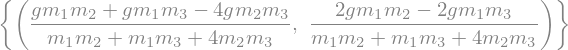

In [8]:
solution_linsolve = sm.linsolve(systemEquations, variablesSolution)
solution_linsolve

Function [linsolve](https://docs.sympy.org/latest/modules/solvers/solveset.html?highlight=linsolve#linsolve) returns a finite set (`FinitSet`) as solution since eventually this could be non unique or a set.
SymPy express this structure between curly brackets.

In [9]:
type(solution_linsolve)

sympy.sets.sets.FiniteSet

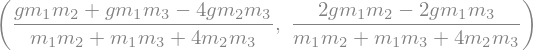

In [10]:
solution_linsolve.args[0]

Function `args` selects elements from the set.
In this case, it shows the tuple that has both solutions.
SymPy shows this structure between parenthesis.

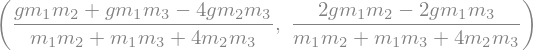

In [11]:
ypp_linsolve = sm.linsolve(systemEquations, variablesSolution).args[0]
ypp_linsolve

We saved the solutions in `ypp_linsolve`, which lets us build equations for the solutions by cycling through the ordering number in the list of variables.

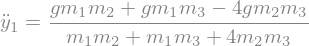

In [12]:
sm.Eq(variablesSolution[0], ypp_linsolve[0]) # Selects the first element.

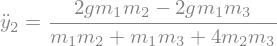

In [13]:
sm.Eq(variablesSolution[1], ypp_linsolve[1]) # Selects the second element.

## Alternative 2 | Solve

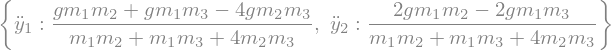

In [14]:
ypp_solve = sm.solve(systemEquations, variablesSolution)
ypp_solve

Function `solve` returns a dictionary (`dict`).
In a dictionary, each `key` corresponds to a definition or `value`.

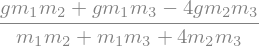

In [15]:
ypp_solve[y1.diff(t,2)]

This lets us generate equations for the solutions by cycling through the list of variables.

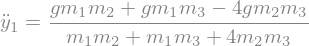

In [16]:
sm.Eq(variablesSolution[0], ypp_solve[variablesSolution[0]])

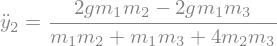

In [17]:
sm.Eq(variablesSolution[1], ypp_solve[variablesSolution[1]])